# Section 0: Import all Required Library

In [19]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize


# Section 1: Define Tickers and Time Range
First, define a list of tickers for the assets we want to include in the portfolio

In [20]:
tickers = ['^NSEI','^BSESN','GLD','NIFTY_MIDCAP_100.NS']
end_date = datetime.today()
start_date = end_date - timedelta(days = 1*365)

# Section 2: Download Adjusted Close Prices
Next, create an empty DataFrame to store the adjusted close prices of each asset. We use the yfinance library to download the data from Yahoo Finance.

In [21]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
print(adj_close_df)


                   ^NSEI        ^BSESN         GLD  NIFTY_MIDCAP_100.NS
Date                                                                   
2023-10-03  19528.750000  65512.101562  169.160004         40608.851562
2023-10-04  19436.099609  65226.039062  169.139999         40047.500000
2023-10-05  19545.750000  65631.570312  168.830002         40046.000000
2023-10-06  19653.500000  65995.632812  169.699997         40284.699219
2023-10-09  19512.349609  65512.390625  172.820007         39744.648438
...                  ...           ...         ...                  ...
2024-09-23  25939.050781  84928.609375  242.679993         60712.398438
2024-09-24  25940.400391  84914.039062  246.070007         60850.800781
2024-09-25  26004.150391  85169.867188  245.729996         60465.148438
2024-09-26  26216.050781  85836.117188  246.979996         60469.148438
2024-09-27  26178.949219  85571.851562  245.020004         60381.148438

[243 rows x 4 columns]


# Section 3: Calculate Covariance Matrix
We compute the covariance matrix using the annualized log returns.

In [23]:
log_returns=np.log(adj_close_df/adj_close_df.shift(1))

In [24]:
log_returns=log_returns.dropna()

In [25]:
cov_matrix=log_returns.cov()*252
print(cov_matrix)

                        ^NSEI    ^BSESN       GLD  NIFTY_MIDCAP_100.NS
^NSEI                0.019403  0.019260  0.001851             0.021515
^BSESN               0.019260  0.019307  0.001817             0.020625
GLD                  0.001851  0.001817  0.022104             0.004531
NIFTY_MIDCAP_100.NS  0.021515  0.020625  0.004531             0.035559


# Section 5: Define Portfolio Performance Metrics
Defined functions to calculate key portfolio performance metrics, including portfolio standard deviation, expected return, and Sharpe ratio, enabling effective risk assessment and return optimization.

In [26]:
def standard_deviation(weights,cov_matrix):
    variance=weights.T@cov_matrix@weights
    return np.sqrt(variance)

In [27]:
def expected_returns(weights,log_returns):
    return np.sum(log_returns.mean()*weights)*252

In [28]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_returns(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

# Section 6: Portfolio Optimization
Established the risk-free rate and defined a function to minimize the negative Sharpe ratio, while implementing constraints and bounds for the optimization process, facilitating the creation of an efficient portfolio.

In [29]:
 risk_free_rate=.02


In [30]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)


# Section 7: Analyze the Optimal Portfolio
We obtain the optimal weights and calculate the expected annual return, expected volatility, and Sharpe ratio for the optimal portfolio.

In [31]:
constraints =[ {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}]
bounds = [(0, 0.5) for _ in range(len(tickers))]

In [32]:
initial_weights = np.array([1/len(tickers)]*len(tickers))
weights=[0.25,0.25,0.25,0.25]


In [33]:
optimized_results = minimize(neg_sharpe_ratio, initial_weights, args=(log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)
optimal_weights = optimized_results.x

In [34]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

optimal_portfolio_return = expected_returns(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

Optimal Weights:
^NSEI: 0.3983
^BSESN: 0.0000
GLD: 0.5000
NIFTY_MIDCAP_100.NS: 0.1017
Expected Annual Return: 0.3573
Expected Volatility: 0.1091
Sharpe Ratio: 3.0900


# Display the Final Portfolio in a Plot
We create a bar chart to visualize the optimal weights of the assets in the portfolio.

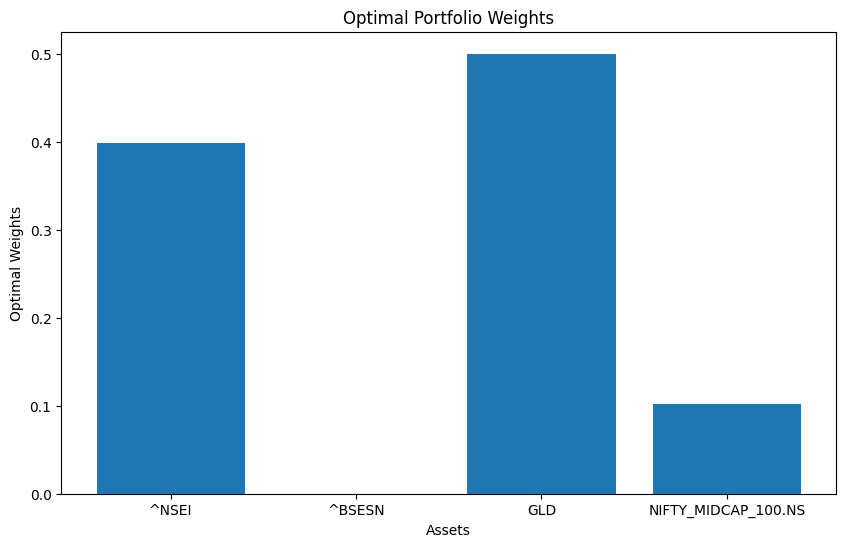

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

# Conclusion 
This Python script effectively demonstrates the application of Modern Portfolio Theory to optimize a stock portfolio. By calculating the optimal weights for each asset, the script aims to maximize the Sharpe ratio, ensuring the highest possible risk-adjusted return. This approach empowers investors to construct a well-diversified portfolio, facilitating informed decision-making when allocating their investments and enhancing overall financial performance.